Loading the Data and Importing Libraries

In [70]:
import numpy as np #importing libraries and loading csv data as df
import pandas as pd
from sklearn.linear_model import LinearRegression
import plotnine as pn


#df = pd.read_csv('data/auto_mpg.csv')
df = pd.read_csv('/blue/zoo6927/share/Jupyter_Content/data/auto_mpg.csv')

In [71]:
df #checking to make sure data looks correct

,mpg,cyl,disp,hp,weight,accel,year,origin,name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


Checking Original Data and Model to have Basline to Compare to

In [72]:
x = df[['hp']] #making sure original data/model work properly
y = df.mpg

In [73]:
print(x, y) #printing x,y results

      hp
0    130
1    165
2    150
3    150
4    140
..   ...
387   86
388   52
389   84
390   79
391   82

[392 rows x 1 columns] 0      18.0
1      15.0
2      18.0
3      16.0
4      17.0
       ... 
387    27.0
388    44.0
389    32.0
390    28.0
391    31.0
Name: mpg, Length: 392, dtype: float64


In [74]:
model = LinearRegression() #testing simplest version of model
model.fit(x, y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [75]:
model = LinearRegression().fit(x,y) #testing simplest version of model

In [76]:
print(model.intercept_, model.coef_) #all testing simpliest version of model

39.93586102117047 [-0.15784473]


In [77]:
model.score(x,y) #OG model

0.6059482578894348

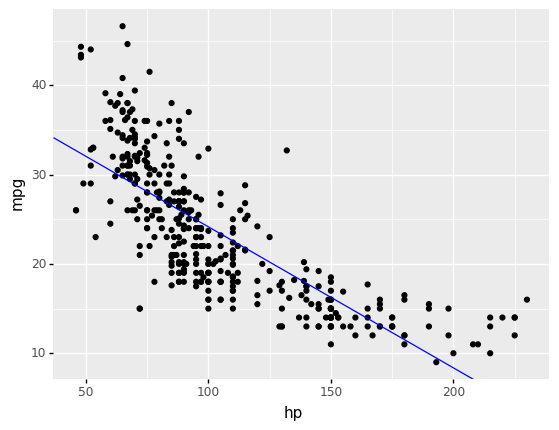

<ggplot: (2939585160762)>

In [78]:
#OG line fitting

pn.ggplot(df, pn.aes(x='hp', y='mpg')) + pn.geom_point() + pn.geom_abline(intercept = model.intercept_, slope = model.coef_[0], color = 'blue')

Creating a Better Model

In [79]:
df['disp_sq'] = df.disp**2 
df['hp_sq'] = df.hp**2
df['accel_sq'] = df.accel**2
#squaring elements of the OG dataset and adding as variables

df #checking data


,mpg,cyl,disp,hp,weight,accel,year,origin,name,disp_sq,hp_sq,accel_sq
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu,94249.0,16900,144.00
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320,122500.0,27225,132.25
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite,101124.0,22500,121.00
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst,92416.0,22500,144.00
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino,91204.0,19600,110.25
...,...,...,...,...,...,...,...,...,...,...,...,...
387,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl,19600.0,7396,243.36
388,44.0,4,97.0,52,2130,24.6,82,2,vw pickup,9409.0,2704,605.16
389,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage,18225.0,7056,134.56
390,28.0,4,120.0,79,2625,18.6,82,1,ford ranger,14400.0,6241,345.96


In [86]:
x4 = df[['hp', 'hp_sq', 'disp', 'disp_sq', 'accel', 'accel_sq', 'cyl']] 
#new frame x4 with hp, hp^2, disp, disp^2, accel, accel^2, cyl
x4 #checking results

,hp,hp_sq,disp,disp_sq,accel,accel_sq,cyl
0,130,16900,307.0,94249.0,12.0,144.00,8
1,165,27225,350.0,122500.0,11.5,132.25,8
2,150,22500,318.0,101124.0,11.0,121.00,8
3,150,22500,304.0,92416.0,12.0,144.00,8
4,140,19600,302.0,91204.0,10.5,110.25,8
...,...,...,...,...,...,...,...
387,86,7396,140.0,19600.0,15.6,243.36,4
388,52,2704,97.0,9409.0,24.6,605.16,4
389,84,7056,135.0,18225.0,11.6,134.56,4
390,79,6241,120.0,14400.0,18.6,345.96,4


In [87]:
model4 = LinearRegression().fit(x4,y) #fitting the model
print(model4.intercept_, model4.coef_) #assessing intercepts

72.01126073727335 [-3.26198179e-01  7.73816628e-04 -9.11047731e-02  1.16246437e-04
 -1.59556293e+00  3.28198753e-02  8.39365632e-01]


In [88]:
model4.score(x4,y) #to get R2... better than OG value!

0.7602852404865649